<a href="https://colab.research.google.com/github/Luna-ber/Projects-Machine-Learning/blob/main/Proyecto_PA_Edad_Talla_Peso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Llamar a las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Llamar al set de datos o dataframe
df = pd.read_csv('/content/drive/MyDrive/DataSet_Edad-Talla-Peso-TA.csv' , sep=';')
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

df.head()

Número de filas: 5000
Número de columnas: 5


,Altura,Peso,Sexo,Edad,PA_max
0,"1,47",53000,M,33,"12,3"
1,172,90,F,28,"13,3"
2,"1,6",118,M,77,"24,9"
3,"1,76",97,M,52,"18,3"
4,"1,81",118,F,73,"25,8"


In [ ]:
print(df.head(10))
print("\n", df.tail(10))
print("\n", df.info())

  Altura   Peso Sexo  Edad PA_max
0   1,47  53000    M    33   12,3
1    172     90    F    28   13,3
2    1,6    118    M    77   24,9
3   1,76     97    M    52   18,3
4   1,81    118    F    73   25,8
5   1,71     69    F    18    9,8
6    182     85    M    54   12,9
7    1,7    122    M    22   14,4
8   1,55     73  NaN    48   14,4
9   1,45     44    F    73   16,6

      Altura  Peso Sexo  Edad PA_max
4990   1,47    43    F    47   13,6
4991   1,45    42    F    76   16,4
4992   1,65    63    F    22   11,4
4993   1,63    57    F    51   11,3
4994   1,85   109    F    27   11,6
4995   1,85   105    M    74   13,6
4996   1,78    66    F    31    9,9
4997   1,81   168    F    57   15,5
4998   2,04    99    M    44   11,8
4999   1,82    99    M    74   19,3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Altura  4901 non-null   object
 1   Peso    5

In [ ]:
print(df.isnull().sum()) #Valores nulos

Altura    99
Peso       0
Sexo      90
Edad       0
PA_max     0
dtype: int64


En función de lo anterior, determinar errores, omisiones, y outliers. Corregir el Dataset eliminando del mismo los registros inconsistentes: ¡este es un lujo que podemos darnos ya que se trata de muchas mediciones!

In [ ]:
df['Altura'] = df['Altura'].astype(str).str.replace(',', '.', regex=False)
df['PA_max'] = df['PA_max'].astype(str).str.replace(',', '.', regex=False)

In [ ]:
df['Altura'] = pd.to_numeric(df['Altura'], errors='coerce')
df['PA_max'] = pd.to_numeric(df['PA_max'], errors='coerce')

In [ ]:
# Convertir cm a metros
def cm_a_metros(Altura):
  if Altura > 2:  # Asumiendo que las alturas mayores a 2 son centímetros
    return Altura / 100
  else:
    return Altura

# Aplica la función a la columna 'altura'
df['Altura'] = df['Altura'].apply(cm_a_metros)


# Convertir gramos a kilogramos
def gramos_a_kilogramos(Peso):
  if Peso > 400:  # Asumiendo que los pesos mayores a 400 son gramos
    return Peso / 1000
  else:
    return Peso

# Aplica la función a la columna 'Peso'
df['Peso'] = df['Peso'].apply(gramos_a_kilogramos)

df.head(5)

,Altura,Peso,Sexo,Edad,PA_max
0,1.47,53.0,M,33,12.3
1,1.72,90.0,F,28,13.3
2,1.60,118.0,M,77,24.9
3,1.76,97.0,M,52,18.3
4,1.81,118.0,F,73,25.8


In [ ]:
# Reemplazamos valores nulos por la moda y media de las columnas
df['Sexo'].fillna(df['Sexo'].mode(), inplace=True)

df['Altura'].fillna(df['Altura'].mean(), inplace=True)

# Reemplaza valores bajos por unos más coherentes
df['Altura'] = np.where(df['Altura'] < 1.30, df['Altura'].mean(), df['Altura'])

df['Peso'] = np.where(df['Peso'] < 35, df['Peso'].mean(), df['Peso'])

In [ ]:
print(df.describe().round(2)) #Descripcion de los datos redondeado a 2 decimales
print("\n", df.describe(include = 'object'))

        Altura    Peso     Edad   PA_max
count  5000.00  5000.0  5000.00  5000.00
mean      1.69    88.1    47.88    16.42
std       0.13    34.1    17.30    13.78
min       1.45    36.0    18.00     8.40
25%       1.60    64.0    33.00    12.50
50%       1.68    80.0    48.00    14.40
75%       1.78   102.0    63.00    16.90
max       2.26   289.0    77.00   193.00

         Sexo
count   4910
unique     2
top        F
freq    2520


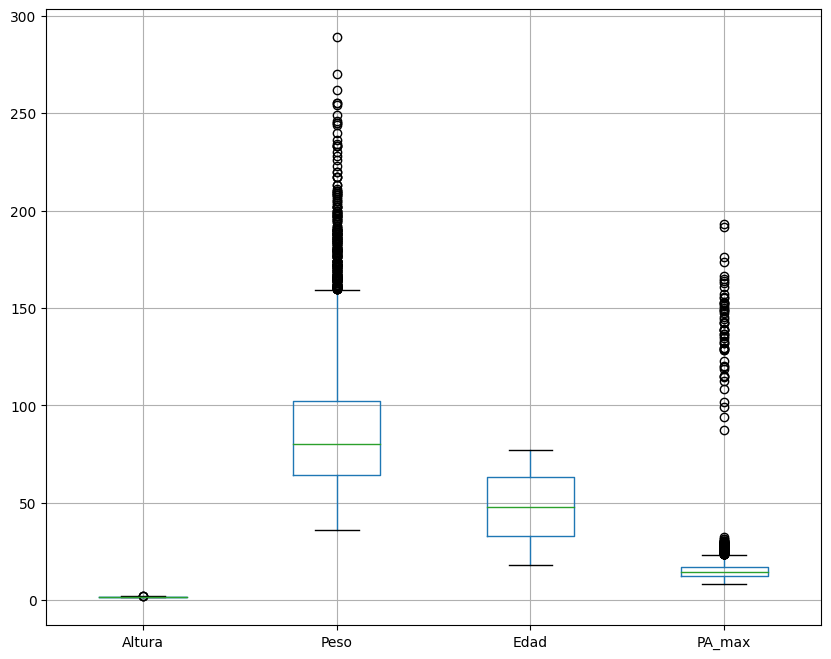

In [ ]:
df.boxplot(figsize=(10, 8))
plt.show()

En base al boxplot identificamos valores atipicos en la columna peso y PA_max

Llegamos así a lo más importante de todo: Tenemos como objetivo establecer el grado de correlación entre las variables; y más específicamente, en qué medida depende la PA del resto de las variables. Esto puede ser de manera directa o modificada. Quizá alguno encuentra que la PA no depende fuertemente de ninguna de las variables, pero sí de una combinación de ellas. Sugerencia: tener en cuenta algunas medidas antropométricas que pueden derivarse de los datos provistos, como, por ejemplo, el IMC (índice de masa corporal).

In [ ]:
#Creacion de la columna IMC (indice de masa corporal)
df['IMC'] = df['Peso'] / (df['Altura'] ** 2)

In [ ]:
#Ajustar valores atipicos de las columnas peso, PA_max e IMC
#Peso
Q1 = df['Peso'].quantile(0.25)
Q3 = df['Peso'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR
df = df[(df['Peso'] >= limite_inferior) & (df['Peso'] <= limite_superior)]

#PA_max
Q1 = df['PA_max'].quantile(0.25)
Q3 = df['PA_max'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR
df = df[(df['PA_max'] >= limite_inferior) & (df['PA_max'] <= limite_superior)]

#IMC
Q1 = df['IMC'].quantile(0.25)
Q3 = df['IMC'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR
df = df[(df['IMC'] >= limite_inferior) & (df['IMC'] <= limite_superior)]

Procurar establecer gráficas descriptivas que presenten la información contenida en el Dataset desde diferentes puntos de vista: la idea es comunicar todos los detalles posibles sobre esta población de manera sintética y gráfica.

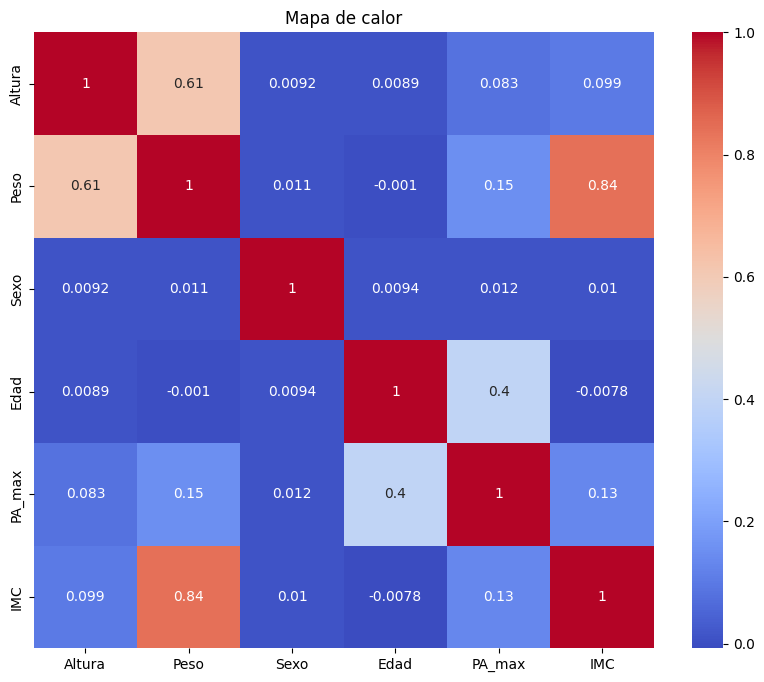

In [ ]:
# Convertimos la variable 'Sexo' a numérica
df['Sexo'] = df['Sexo'].map({'F': 1, 'M': 0})

correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor")
plt.show()

En base al mapa de calor, podemos observar que las columnas/variables que tienen mas relacion con la PA_max, son el peso, edad y altura

In [ ]:
df['Sexo']

,Sexo
0,0.0
1,1.0
3,0.0
5,1.0
6,0.0
...,...
4994,1.0
4995,0.0
4996,1.0
4998,0.0


También se puede, considerando lo anterior, establecer una suerte de regresión lineal para las variables que guarden cierto grado de interdependencia: sería interesante presentar los resultados obtenidos.

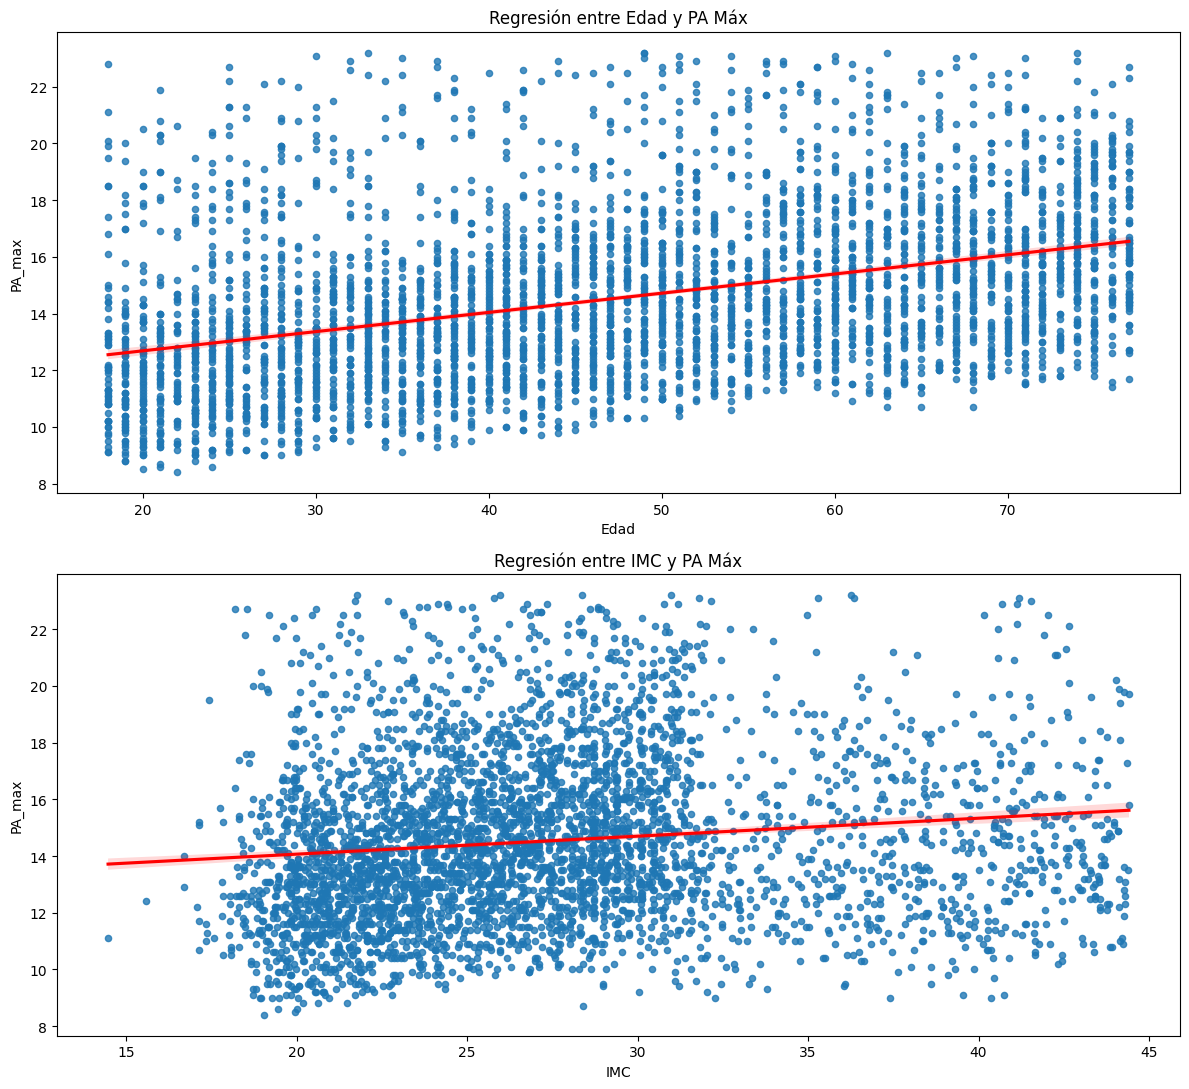

In [ ]:
#Crear regresion lineal entre edad y PA_max e IMC y PA_max
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 11))

sns.regplot(data=df, x='Edad', y='PA_max', ax=ax[0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[0].set_title('Regresión entre Edad y PA Máx')

sns.regplot(data=df, x='IMC', y='PA_max', ax=ax[1], scatter_kws={'s': 20}, line_kws={'color': 'red'})
ax[1].set_title('Regresión entre IMC y PA Máx')

plt.tight_layout()
plt.show()

En el primer grafico demostramos que a partir de los 50 años las personas comienzan a tener un pequeño aumento en su presion arterial.
Y en el segundo grafico nos muestra que dependiendo su IMC tambien pueden tener un auemnto en su PA_max.

Luego de analizar los datos,logramos obtener que la edad, peso y altura son las variables por las cuales se ve mas afectada la presion arterial.